In [1]:
import pandas as pd
import copy
import numpy as np
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras as keras
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import autograd.numpy as anp
from autograd import jacobian

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Patrice\\Documents\\Neural Network\\Distillation'

In [3]:
data = pd.read_csv("Still2.csv")
dataset = data.values
dataset

array([[125.0332489 ,  48.50588608, 173.5945892 , ..., 346.2849731 ,
          1.84048827,  84.        ],
       [134.0503845 ,  47.58906555, 173.138443  , ..., 501.0728149 ,
          1.75659263,  84.5       ],
       [129.2543335 ,  48.96544647, 173.3461304 , ..., 506.2529602 ,
          1.87202663,  84.25      ],
       ...,
       [119.2128754 ,  98.75088501, 173.1824493 , ..., 618.1845703 ,
          1.80861027,  83.46      ],
       [118.696701  ,  99.91643524, 173.3771515 , ..., 617.1276245 ,
          1.81537637,  83.44      ],
       [118.7883911 ,  99.95228577, 173.3963928 , ..., 599.4073486 ,
          1.79868844,  83.55      ]])

In [4]:
data.columns

Index(['RefluxFlow ', 'SteamControlValve', 'FeedTempintoStill', 'BottomsTemp ',
       'TopsTemp', 'RefluxTemp', 'FeedPurity', 'ReboilerPressure',
       'MainCondenserPressure ', 'TWCV ', 'CondenserPressure',
       'FeedFlowtoStill', 'Efficiency', 'Purity'],
      dtype='object')

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RefluxFlow,2610.0,125.967697,20.374146,30.964821,114.308083,124.573139,134.975803,242.570694
SteamControlValve,2610.0,57.970082,11.440985,39.952881,50.153181,54.853920,62.423813,100.000000
FeedTempintoStill,2610.0,168.486832,3.400376,137.797104,167.253418,169.258316,170.531158,175.722763
BottomsTemp,2610.0,220.545241,0.980802,211.884247,219.849579,220.477570,221.221378,223.619217
TopsTemp,2610.0,182.229494,0.973785,179.581482,181.526058,182.150177,182.860538,189.440277
RefluxTemp,2610.0,151.356486,5.962036,129.932465,147.397453,152.008919,156.330864,159.996277
FeedPurity,2610.0,56.026031,2.460993,40.910774,55.203824,56.621929,57.622443,59.967125
ReboilerPressure,2610.0,25.774587,4.053145,15.487555,22.750895,25.364768,28.819992,37.350178
MainCondenserPressure,2610.0,1.436490,0.242539,0.690137,1.261244,1.442193,1.625869,2.113526
TWCV,2610.0,49.442112,13.608000,0.000000,40.000000,53.000000,60.000000,75.000000


In [6]:
#Split the data into training, validation, and testing sets, 60/20/20
train, test = train_test_split(data, test_size=0.2, random_state=1)
#Use .25 on the training data this time so the math works out
train,val = train_test_split(train, test_size=0.25, random_state=1)
#Print the dimensions of each feature matrix (3 matrices)
print('Training feature dimensions:',train.shape)
print('Testing feature dimensions:',test.shape)
print('Validation feature dimensions:',val.shape) 


Training feature dimensions: (1566, 14)
Testing feature dimensions: (522, 14)
Validation feature dimensions: (522, 14)


In [7]:
#Remove output columns from training data
train_stats = train.describe()
train_stats.pop('Efficiency')
train_stats.pop('Purity')
train_stats = train_stats.transpose()

In [8]:
train_stats

,count,mean,std,min,25%,50%,75%,max
RefluxFlow,1566.0,126.184336,19.972723,30.964821,114.487127,124.962868,134.930340,242.570694
SteamControlValve,1566.0,57.779500,11.129633,39.952881,50.186040,54.838202,62.245588,100.000000
FeedTempintoStill,1566.0,168.502456,3.389906,137.797104,167.327911,169.295502,170.531075,174.776810
BottomsTemp,1566.0,220.533329,0.981671,211.884247,219.844795,220.486252,221.227146,223.619217
TopsTemp,1566.0,182.223596,0.973696,179.762695,181.524178,182.150177,182.859493,189.440277
RefluxTemp,1566.0,151.373872,5.964649,129.932465,147.302563,152.099426,156.266609,159.996277
FeedPurity,1566.0,56.135350,2.400012,40.910774,55.306348,56.718826,57.664707,59.967125
ReboilerPressure,1566.0,25.726607,4.041392,15.799937,22.743465,25.283723,28.766784,37.075279
MainCondenserPressure,1566.0,1.434515,0.241781,0.690137,1.260102,1.439908,1.618471,2.111622
TWCV,1566.0,49.310823,13.743887,0.000000,40.000000,53.000000,60.000000,75.000000


In [9]:
#normalization function
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

#function that removes output columns from dataset and places into two arrays, y1 and y2
def format_output(data):
    y1 = data.pop('Efficiency')
    y1 = np.array(y1)
    y2 = data.pop('Purity')
    y2 = np.array(y2)
    return y1, y2


#format training, validation, and testing sets
Y_train = format_output(train)
Y_test = format_output(test)
Y_val = format_output(val)


In [10]:
eff_std = np.std(Y_train[0])
eff_mean = np.mean(Y_train[0])
pur_std = np.std(Y_train[1])
pur_mean = np.mean(Y_train[1])
pur_std
def eff_norm(x):
    return (x - eff_mean) / eff_std
def pur_norm(x):
    return (x - pur_mean) / pur_std
def Y_norm(x):
    y1 = eff_norm(x[0])
    y2 = pur_norm(x[1])
    return y1, y2
Y_train = Y_norm(Y_train)
Y_test = Y_norm(Y_test)
Y_val = Y_norm(Y_val)

In [11]:
import copy
#normalize the data sets
#X_train = np.array(norm(train))
#X_test = np.array(norm(test))
#X_val = np.array(norm(val))

test_data = copy.deepcopy(test)

scaler = StandardScaler()
X_train = scaler.fit_transform(train)
#Apply same transformation to test data and validation data
X_test = scaler.transform(test)
X_val = scaler.transform(val)

#changes all NaN values to 0
NaNtrain = isnan(X_train)
NaNtest = isnan(X_test)
NaNval = isnan(X_val)
X_train[NaNtrain] = 0
X_test[NaNtest] = 0
X_val[NaNval] = 0



In [12]:
X_test[0]

array([-0.99693948,  1.25767295, -0.98230458,  1.45687439,  1.63213014,
        1.2392826 ,  0.70129185,  0.74143378,  2.20465761,  0.45046604,
        1.64699183,  1.70720803])

In [13]:
#funtion that defines the structure(layers) of your Neural Network
def build_model():
    # Define model layers.
    input_layer = keras.Input(shape=(len(train.columns),))
    
    dense = Dense(units='128', activation='relu')(input_layer)
    dense = Dense(units='16', activation='relu')(dense)
    # Y1 output will be fed from the dense
    y1_output = Dense(units='1', activation='linear', name='Efficiency')(dense)
    # Y2 output will be fed from the dropout
    
    dense = Dense(units='128', activation='relu')(input_layer)
    dense = Dense(units='16', activation='relu')(dense)
    y2_output = Dense(units='1',activation='linear', name='Purity')(dense)
    
    # Define the model with the input layer 
    # and a list of output layers
    model = keras.Model(inputs=input_layer,outputs=[y1_output, y2_output])
    
    # Specify the optimizer, and compile the model with loss functions for both outputs
    optimizer = tf.keras.optimizers.SGD(lr=0.001)
    model.compile(optimizer='adam',
              loss={'Efficiency': 'mean_squared_error', 'Purity': 'mean_squared_error'},
    metrics={'Efficiency':tf.keras.metrics.MeanSquaredError(),
          'Purity':tf.keras.metrics.MeanSquaredError()})
    return model

In [14]:
#Fit model with 100 epochs and batch size of 100
model = build_model()
model.fit(X_train, Y_train, epochs=200, batch_size=150, validation_data=(X_val, Y_val))

Epoch 1/200
11/11 [==============================] - 0s 20ms/step - loss: 1.8617 - Efficiency_loss: 0.8693 - Purity_loss: 0.9924 - Efficiency_mean_squared_error: 0.8693 - Purity_mean_squared_error: 0.9924 - val_loss: 2.0171 - val_Efficiency_loss: 0.7648 - val_Purity_loss: 1.2523 - val_Efficiency_mean_squared_error: 0.7648 - val_Purity_mean_squared_error: 1.2523
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.4292 - Efficiency_loss: 0.5995 - Purity_loss: 0.8297 - Efficiency_mean_squared_error: 0.5995 - Purity_mean_squared_error: 0.8297 - val_loss: 1.6941 - val_Efficiency_loss: 0.5896 - val_Purity_loss: 1.1046 - val_Efficiency_mean_squared_error: 0.5896 - val_Purity_mean_squared_error: 1.1046
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1970 - Efficiency_loss: 0.4962 - Purity_loss: 0.7008 - Efficiency_mean_squared_error: 0.4962 - Purity_mean_squared_error: 0.7008 - val_loss: 1.4992 - val_Efficiency_loss: 0.5270 - val_Purity_loss: 0

11/11 [==============================] - 0s 1ms/step - loss: 0.6546 - Efficiency_loss: 0.2899 - Purity_loss: 0.3647 - Efficiency_mean_squared_error: 0.2899 - Purity_mean_squared_error: 0.3647 - val_loss: 1.1434 - val_Efficiency_loss: 0.4285 - val_Purity_loss: 0.7149 - val_Efficiency_mean_squared_error: 0.4285 - val_Purity_mean_squared_error: 0.7149
Epoch 24/200
11/11 [==============================] - 0s 1ms/step - loss: 0.6523 - Efficiency_loss: 0.2878 - Purity_loss: 0.3645 - Efficiency_mean_squared_error: 0.2878 - Purity_mean_squared_error: 0.3645 - val_loss: 1.1507 - val_Efficiency_loss: 0.4247 - val_Purity_loss: 0.7261 - val_Efficiency_mean_squared_error: 0.4247 - val_Purity_mean_squared_error: 0.7261
Epoch 25/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6370 - Efficiency_loss: 0.2818 - Purity_loss: 0.3552 - Efficiency_mean_squared_error: 0.2818 - Purity_mean_squared_error: 0.3552 - val_loss: 1.1315 - val_Efficiency_loss: 0.4268 - val_Purity_loss: 0.7047 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.4940 - Efficiency_loss: 0.2117 - Purity_loss: 0.2823 - Efficiency_mean_squared_error: 0.2117 - Purity_mean_squared_error: 0.2823 - val_loss: 1.1108 - val_Efficiency_loss: 0.4237 - val_Purity_loss: 0.6872 - val_Efficiency_mean_squared_error: 0.4237 - val_Purity_mean_squared_error: 0.6872
Epoch 46/200
11/11 [==============================] - 0s 1ms/step - loss: 0.4897 - Efficiency_loss: 0.2059 - Purity_loss: 0.2839 - Efficiency_mean_squared_error: 0.2059 - Purity_mean_squared_error: 0.2839 - val_loss: 1.1026 - val_Efficiency_loss: 0.4142 - val_Purity_loss: 0.6884 - val_Efficiency_mean_squared_error: 0.4142 - val_Purity_mean_squared_error: 0.6884
Epoch 47/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4802 - Efficiency_loss: 0.2035 - Purity_loss: 0.2767 - Efficiency_mean_squared_error: 0.2035 - Purity_mean_squared_error: 0.2767 - val_loss: 1.1048 - val_Efficiency_loss: 0.4219 - val_Purity_loss: 0.6829 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.3930 - Efficiency_loss: 0.1595 - Purity_loss: 0.2335 - Efficiency_mean_squared_error: 0.1595 - Purity_mean_squared_error: 0.2335 - val_loss: 1.0814 - val_Efficiency_loss: 0.4183 - val_Purity_loss: 0.6631 - val_Efficiency_mean_squared_error: 0.4183 - val_Purity_mean_squared_error: 0.6631
Epoch 68/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3882 - Efficiency_loss: 0.1583 - Purity_loss: 0.2299 - Efficiency_mean_squared_error: 0.1583 - Purity_mean_squared_error: 0.2299 - val_loss: 1.0812 - val_Efficiency_loss: 0.4135 - val_Purity_loss: 0.6677 - val_Efficiency_mean_squared_error: 0.4135 - val_Purity_mean_squared_error: 0.6677
Epoch 69/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3896 - Efficiency_loss: 0.1566 - Purity_loss: 0.2330 - Efficiency_mean_squared_error: 0.1566 - Purity_mean_squared_error: 0.2330 - val_loss: 1.0862 - val_Efficiency_loss: 0.4184 - val_Purity_loss: 0.6678 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.3234 - Efficiency_loss: 0.1281 - Purity_loss: 0.1953 - Efficiency_mean_squared_error: 0.1281 - Purity_mean_squared_error: 0.1953 - val_loss: 1.0884 - val_Efficiency_loss: 0.4212 - val_Purity_loss: 0.6672 - val_Efficiency_mean_squared_error: 0.4212 - val_Purity_mean_squared_error: 0.6672
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3180 - Efficiency_loss: 0.1273 - Purity_loss: 0.1906 - Efficiency_mean_squared_error: 0.1273 - Purity_mean_squared_error: 0.1906 - val_loss: 1.0964 - val_Efficiency_loss: 0.4211 - val_Purity_loss: 0.6754 - val_Efficiency_mean_squared_error: 0.4211 - val_Purity_mean_squared_error: 0.6754
Epoch 91/200
11/11 [==============================] - 0s 1ms/step - loss: 0.3189 - Efficiency_loss: 0.1279 - Purity_loss: 0.1911 - Efficiency_mean_squared_error: 0.1279 - Purity_mean_squared_error: 0.1911 - val_loss: 1.0889 - val_Efficiency_loss: 0.4215 - val_Purity_loss: 0.6674 - val

11/11 [==============================] - 0s 1ms/step - loss: 0.2684 - Efficiency_loss: 0.1094 - Purity_loss: 0.1590 - Efficiency_mean_squared_error: 0.1094 - Purity_mean_squared_error: 0.1590 - val_loss: 1.1130 - val_Efficiency_loss: 0.4300 - val_Purity_loss: 0.6829 - val_Efficiency_mean_squared_error: 0.4300 - val_Purity_mean_squared_error: 0.6829
Epoch 112/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2711 - Efficiency_loss: 0.1063 - Purity_loss: 0.1648 - Efficiency_mean_squared_error: 0.1063 - Purity_mean_squared_error: 0.1648 - val_loss: 1.1080 - val_Efficiency_loss: 0.4284 - val_Purity_loss: 0.6796 - val_Efficiency_mean_squared_error: 0.4284 - val_Purity_mean_squared_error: 0.6796
Epoch 113/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2739 - Efficiency_loss: 0.1078 - Purity_loss: 0.1661 - Efficiency_mean_squared_error: 0.1078 - Purity_mean_squared_error: 0.1661 - val_loss: 1.1140 - val_Efficiency_loss: 0.4345 - val_Purity_loss: 0.6795 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.2308 - Efficiency_loss: 0.0894 - Purity_loss: 0.1414 - Efficiency_mean_squared_error: 0.0894 - Purity_mean_squared_error: 0.1414 - val_loss: 1.1180 - val_Efficiency_loss: 0.4325 - val_Purity_loss: 0.6855 - val_Efficiency_mean_squared_error: 0.4325 - val_Purity_mean_squared_error: 0.6855
Epoch 134/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2297 - Efficiency_loss: 0.0891 - Purity_loss: 0.1407 - Efficiency_mean_squared_error: 0.0891 - Purity_mean_squared_error: 0.1407 - val_loss: 1.1248 - val_Efficiency_loss: 0.4322 - val_Purity_loss: 0.6926 - val_Efficiency_mean_squared_error: 0.4322 - val_Purity_mean_squared_error: 0.6926
Epoch 135/200
11/11 [==============================] - 0s 1ms/step - loss: 0.2211 - Efficiency_loss: 0.0869 - Purity_loss: 0.1343 - Efficiency_mean_squared_error: 0.0869 - Purity_mean_squared_error: 0.1343 - val_loss: 1.1438 - val_Efficiency_loss: 0.4379 - val_Purity_loss: 0.7059 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.1964 - Efficiency_loss: 0.0795 - Purity_loss: 0.1169 - Efficiency_mean_squared_error: 0.0795 - Purity_mean_squared_error: 0.1169 - val_loss: 1.1371 - val_Efficiency_loss: 0.4405 - val_Purity_loss: 0.6966 - val_Efficiency_mean_squared_error: 0.4405 - val_Purity_mean_squared_error: 0.6966
Epoch 156/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1920 - Efficiency_loss: 0.0784 - Purity_loss: 0.1137 - Efficiency_mean_squared_error: 0.0784 - Purity_mean_squared_error: 0.1137 - val_loss: 1.1448 - val_Efficiency_loss: 0.4399 - val_Purity_loss: 0.7049 - val_Efficiency_mean_squared_error: 0.4399 - val_Purity_mean_squared_error: 0.7049
Epoch 157/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1922 - Efficiency_loss: 0.0781 - Purity_loss: 0.1141 - Efficiency_mean_squared_error: 0.0781 - Purity_mean_squared_error: 0.1141 - val_loss: 1.1398 - val_Efficiency_loss: 0.4428 - val_Purity_loss: 0.6970 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.1766 - Efficiency_loss: 0.0752 - Purity_loss: 0.1014 - Efficiency_mean_squared_error: 0.0752 - Purity_mean_squared_error: 0.1014 - val_loss: 1.1699 - val_Efficiency_loss: 0.4649 - val_Purity_loss: 0.7051 - val_Efficiency_mean_squared_error: 0.4649 - val_Purity_mean_squared_error: 0.7051
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1799 - Efficiency_loss: 0.0785 - Purity_loss: 0.1013 - Efficiency_mean_squared_error: 0.0785 - Purity_mean_squared_error: 0.1013 - val_loss: 1.1646 - val_Efficiency_loss: 0.4512 - val_Purity_loss: 0.7134 - val_Efficiency_mean_squared_error: 0.4512 - val_Purity_mean_squared_error: 0.7134
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.1804 - Efficiency_loss: 0.0759 - Purity_loss: 0.1044 - Efficiency_mean_squared_error: 0.0759 - Purity_mean_squared_error: 0.1044 - val_loss: 1.1709 - val_Efficiency_loss: 0.4469 - val_Purity_loss: 0.7240 - v

11/11 [==============================] - 0s 1ms/step - loss: 0.1527 - Efficiency_loss: 0.0625 - Purity_loss: 0.0901 - Efficiency_mean_squared_error: 0.0625 - Purity_mean_squared_error: 0.0901 - val_loss: 1.1676 - val_Efficiency_loss: 0.4478 - val_Purity_loss: 0.7198 - val_Efficiency_mean_squared_error: 0.4478 - val_Purity_mean_squared_error: 0.7198
Epoch 200/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1569 - Efficiency_loss: 0.0670 - Purity_loss: 0.0899 - Efficiency_mean_squared_error: 0.0670 - Purity_mean_squared_error: 0.0899 - val_loss: 1.1638 - val_Efficiency_loss: 0.4487 - val_Purity_loss: 0.7151 - val_Efficiency_mean_squared_error: 0.4487 - val_Purity_mean_squared_error: 0.7151


In [15]:
import os.path
if os.path.isfile('distillation_model.h5') is False:
    model.save('distillation_model.h5')

In [16]:
from tensorflow.keras.models import load_model
prediction = load_model('distillation_model.h5')
prediction.optimizer

In [17]:
prediction.predict(X_test[1:2])

[array([[0.0356084]], dtype=float32), array([[1.0919118]], dtype=float32)]

In [18]:
My_TFlite_Model = tf.keras.models.load_model('distillation_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(My_TFlite_Model)
tflite_model = converter.convert()

open('My_TFlite_Model.tflite', 'wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Patrice\AppData\Local\Temp\tmp9mrx5u5h\assets


32444

In [19]:
# Test the model and print loss and rmse for both outputs
loss,Y1_loss,Y2_loss,Y1_mse,Y2_mse=model.evaluate(x=X_val, y=Y_val)
print()
print(f'loss: {loss}')
print(f'efficiency_loss: {Y1_loss}')
print(f'purity_loss: {Y2_loss}')
print(f'efficiency_rmse: {Y1_mse}')
print(f'purity_rmse: {Y2_mse}')

17/17 [==============================] - 0s 411us/step - loss: 1.1638 - Efficiency_loss: 0.4487 - Purity_loss: 0.7151 - Efficiency_mean_squared_error: 0.4487 - Purity_mean_squared_error: 0.7151

loss: 1.1637991666793823
efficiency_loss: 0.4486972689628601
purity_loss: 0.7151017189025879
efficiency_rmse: 0.4486972689628601
purity_rmse: 0.7151017189025879


In [20]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    
    plt.plot([-100, 100], [-100, 100])
    plt.show()

Efficiency MSE for Testing data is 0.4770901666121508
Purity MSE for Testing data is 0.537098655236626


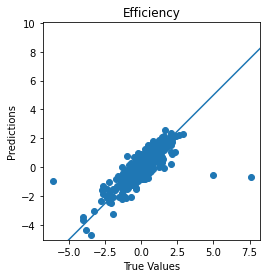

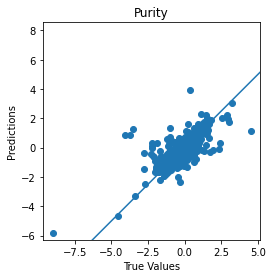

In [21]:
# Run predict
pred_test = model.predict(X_test)

flow_pred = pred_test[0]
purity_pred = pred_test[1]
#Calculate MSE
print('Efficiency MSE for Testing data is', mean_squared_error(Y_test[0], flow_pred))
print('Purity MSE for Testing data is', mean_squared_error(Y_test[1], purity_pred))


plot_diff(Y_test[0], flow_pred, title='Efficiency')
plot_diff(Y_test[1], purity_pred, title='Purity')

In [22]:
def plot_metrics(metric_name, title, ylim):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(model.history.history[metric_name], color='blue', label='Training RMSE')
    plt.plot(model.history.history['val_' + metric_name], color='orange', label='Validation RMSE')
    plt.legend()

In [23]:
#Plot Flow RMSE 
#plot_metrics(metric_name='Efficiency_mean_squared_error', title='Efficiency RMSE', ylim=3)

In [24]:
#Plot Purity RMSE
#plot_metrics(metric_name='Purity_mean_squared_error', title='Purity RMSE', ylim=5)

In [25]:
weights = [layer.get_weights()[0] for layer in model.layers[1:]]
biases = [layer.get_weights()[1] for layer in model.layers[1:]]

In [26]:
w1 = np.array([(w) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==0])
b1 = np.array([(b) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==0])
w2 = np.array([(w) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==1])
b2 = np.array([(b) for z, (w,b) in enumerate(zip(weights,biases)) if z%2==1])

C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths o

In [27]:
def relu(node):
    return max(0, node)
    
def eff_rev_norm(efficiency):
    return (efficiency*eff_std) + eff_mean
    
def pur_rev_norm(purity):
    return (purity*pur_std) + pur_mean

In [28]:
def singleEffOutput(a,weights,biases):
    singleInputarray = copy.deepcopy(X_test)
    singleInputarray[:] = 0
    singleInputarray[0] = a[0]
    for w, b in zip(weights[:-1],biases[:-1]):
        singleInputarray = (np.dot(singleInputarray,w) + b)
        for i in range(len(singleInputarray)):
            for j in range(len(b)):
                singleInputarray[i][j] = relu(singleInputarray[i][j])
    singleInputarray = (np.dot(singleInputarray,weights[-1]) + biases[-1])

    return eff_rev_norm(singleInputarray[0])

def singlePurOutput(a, weights, biases):
    singleInputarray = copy.deepcopy(X_test)
    singleInputarray[:] = 0
    singleInputarray[0] = a[0]
    for w, b in zip(weights[:-1],biases[:-1]):
        singleInputarray = (np.dot(singleInputarray,w) + b)
        for i in range(len(singleInputarray)):
            for j in range(len(b)):
                singleInputarray[i][j] = relu(singleInputarray[i][j])
    singleInputarray = (np.dot(singleInputarray,weights[-1]) + biases[-1])

    return pur_rev_norm(singleInputarray[0])

def effOutput(a,weights,biases):
    for w, b in zip(weights[:-1],biases[:-1]):
        a = (np.dot(a,w) + b)
        for i in range(len(a)):
            for j in range(len(b)):
                a[i][j] = relu(a[i][j])
    a = (np.dot(a,weights[-1]) + biases[-1])
    return eff_rev_norm(a)

def purOutput(a,weights,biases):
    for w, b in zip(weights[:-1],biases[:-1]):
        a = (np.dot(a,w) + b)
        for i in range(len(a)):
            for j in range(len(b)):
                a[i][j] = relu(a[i][j])
    a = (np.dot(a,weights[-1]) + biases[-1])
    return pur_rev_norm(a)
        

In [29]:
#singleEffOutput(X_test,w1,b1)

In [30]:
np.mean(purOutput(X_test, w2, b2))

83.42795686895877

In [31]:
def ANNoutput(a,weight,bias):
    if len(a) == len(X_test[0]):
        singleInputarray = copy.deepcopy(X_test)
        singleInputarray[:] = 0
        singleInputarray[0] = a
        for w, b in zip(weight[:-1],bias[:-1]):
            singleInputarray = (np.dot(singleInputarray,w) + b)
            for i in range(len(singleInputarray)):
                for j in range(len(b)):
                    singleInputarray[i][j] = relu(singleInputarray[i][j])
        singleInputarray = (np.dot(singleInputarray,weight[-1]) + bias[-1])

        return singleInputarray[0]
    else:
        for w, b in zip(weight[:-1],bias[:-1]):
            a = (np.dot(a,w) + b)
            for i in range(len(a)):
                for j in range(len(b)):
                    a[i][j] = relu(a[i][j])
        a = (np.dot(a,weight[-1]) + bias[-1])
        wb = [weights,biases]
        if bias[0][0] == wb[1][0][0]:
            return eff_rev_norm(a)
        else:
            return pur_rev_norm(a)

In [32]:
def efficiency_sensitivity(data, max_percent, increment):
    import copy
    data0 = copy.deepcopy(data)
    sens = {
                'RefluxFlow': [],  
                'SteamControlValve':[], 'FeedTempintoStill':[], 'BottomsTemp':[],
                'TopsTemp':[], 'RefluxTemp':[], 'FeedPurity':[], 'ReboilerPressure':[],
                'MainCondenserPressure':[], 'TWCV':[], 'CondenserPressure':[],
                'FeedFlow':[]
    }

    for idx in sens:
        i = -(max_percent/100)
        for t in range(len(data)):
            while i <= max_percent/100:
                data_run = copy.deepcopy(data0)
                data_run[t][list(sens.keys()).index(idx)] +=  i*data_run[t][list(sens.keys()).index(idx)]
                sens[idx].append(effOutput(data_run, w1, b1)[0])
                i += increment/100

    variables = list(sens.keys())

    base = effOutput(data_run, w1, b1)[0]

    values = []
    lows = []
    for idx in sens:
        values.append(max(sens[idx]))
        lows.append(base - values[list(sens.keys()).index(idx)]/2)


    ###############################################################################
    # The actual drawing part

    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom

    # Plot the bars, one by one
    for y, low, value in zip(ys, lows, values):
        # The width of the 'low' and 'high' pieces
        low_width = base - low
        high_width = low + value - base

        # Each bar is a "broken" horizontal bar chart
        plt.broken_barh(
            [(low, low_width), (base, high_width)],
            (y-0.4 , .9),
            facecolors=['blue', 'red'],  # Try different colors if you like
            edgecolors=['black', 'black'],
            linewidth=1,
        )

        # Display the value as text. It should be positioned in the center of
        # the 'high' bar, except if there isn't any room there, then it should be
        # next to bar instead.
        x = base + high_width / 2
        if x <= base + .5:
            x = base + high_width + .5
        plt.text(x, y, str(value), va='center', ha='center')

    # Draw a vertical line down the middle
    plt.axvline(base, color='black')

    # Position the x-axis on the top, hide all the other spines (=axis lines)
    axes = plt.gca()
    tl = plt.gca().get_yticklabels()# (gca = get current axes)
    maxsize = max([t.get_window_extent().width for t in tl])
    axes.spines['left'].set_visible(True)
    axes.spines['right'].set_visible(True)
    axes.spines['bottom'].set_visible(True)
    axes.xaxis.set_ticks_position('top')

    # Make the y-axis display the variables
    plt.yticks(ys, variables)

    # Set the portion of the x- and y-axes to show
    plt.xlim(base - 1.5, base + 1.5)
    plt.ylim(-1, len(variables))

    return pd.DataFrame.from_dict(sens)

#efficiency_sensitivity(X_test, 100, 20)

In [33]:
def purity_sensitivity(data, max_percent, increment):
        import copy
        data0 = copy.deepcopy(data)
        sens = {
                    'RefluxFlow': [],  
                    'SteamControlValve':[], 'FeedTempintoStill':[], 'BottomsTemp':[],
                    'TopsTemp':[], 'RefluxTemp':[], 'FeedPurity':[], 'ReboilerPressure':[],
                    'MainCondenserPressure':[], 'TWCV':[], 'CondenserPressure':[],
                    'FeedFlow':[]
        }

        for idx in sens:
            i = -(max_percent/100)
            for t in range(len(data)):
                while i <= max_percent/100:
                    data_run = copy.deepcopy(data0)
                    data_run[t][list(sens.keys()).index(idx)] +=  i*data_run[t][list(sens.keys()).index(idx)]
                    sens[idx].append(purOutput(data_run, w2, b2)[0])
                    i += increment/100

        variables = list(sens.keys())

        base = purOutput(data_run, w2, b2)[0]
        values = []
        lows = []
        for idx in sens:
            values.append(max(sens[idx]))
            lows.append(base - values[list(sens.keys()).index(idx)]/2)


        ###############################################################################
        # The actual drawing part

        # The y position for each variable
        ys = range(len(values))[::-1]  # top to bottom


        # Plot the bars, one by one
        for y, low, value in zip(ys, lows, values):
            # The width of the 'low' and 'high' pieces
            low_width = base - low
            high_width = low + value - base

            # Each bar is a "broken" horizontal bar chart
            plt.broken_barh(
                [(low, low_width), (base, high_width)],
                (y-0.4 , .9),
                facecolors=['blue', 'red'],  # Try different colors if you like
                edgecolors=['black', 'black'],
                linewidth=1,
            )

            # Display the value as text. It should be positioned in the center of
            # the 'high' bar, except if there isn't any room there, then it should be
            # next to bar instead.
            x = base + high_width / 2
            if x <= base + .5:
                x = base + high_width + .5
            plt.text(x, y, str(value), va='center', ha='center')

        # Draw a vertical line down the middle
        plt.axvline(base, color='black')

        # Position the x-axis on the top, hide all the other spines (=axis lines)
        axes = plt.gca()
        tl = plt.gca().get_yticklabels()# (gca = get current axes)
        #maxsize = max([t.get_window_extent().width for t in tl])
        axes.spines['left'].set_visible(True)
        axes.spines['right'].set_visible(True)
        axes.spines['bottom'].set_visible(True)
        axes.xaxis.set_ticks_position('top')

        # Make the y-axis display the variables
        plt.yticks(ys, variables)

        # Set the portion of the x- and y-axes to show
        plt.xlim(base - 50, base + 50)
        plt.ylim(-1, len(variables))

        return pd.DataFrame.from_dict(sens)
#purity_sensitivity(X_test, 100, 20)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,RefluxFlow,SteamControlValve,FeedTempintoStill,BottomsTemp,TopsTemp,RefluxTemp,FeedPurity,ReboilerPressure,MainCondenserPressure,TWCV,CondenserPressure,FeedFlow
0,[1.8145340891857829],[2.0071341910211786],[1.8823691156521842],[1.8547563613845015],[1.835353947131401],[1.9289049996085406],[1.845000529659485],[1.8449131102171956],[1.7243479610137464],[1.864701033752169],[1.855637386286868],[1.787315638472209]
1,[1.830241752632125],[1.970036889882262],[1.8786911472861088],[1.8579448014056306],[1.8334855587957528],[1.929238818698417],[1.84805306973554],[1.8442145162753103],[1.7235569010067615],[1.8623878528636248],[1.8665181589402644],[1.8025654523187564]
2,[1.8394210145178953],[1.9393039907823195],[1.8724122465236634],[1.8570868115964456],[1.8341820581116093],[1.9233224827110946],[1.8496467408114452],[1.8485950568391853],[1.7395285002866145],[1.8602881101436488],[1.8708008773572078],[1.8189016076684217]
3,[1.8440336429027515],[1.9127073808486947],[1.8720617578706877],[1.8571052712751177],[1.842989167931563],[1.910298860873643],[1.8517281416627798],[1.8524908133850697],[1.7776239455134955],[1.8581883674236732],[1.8693102513286683],[1.8350652586738896]
4,[1.8491206972744552],[1.8831691711697165],[1.8639411965720156],[1.8547053240310196],[1.8507932574947528],[1.8836903136200636],[1.852963752559505],[1.8557771913683803],[1.8194708767277352],[1.8560886247036972],[1.8632817001309758],[1.8460974889153459]
5,[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558],[1.8554224093072558]
6,[1.8617720848972912],[1.8369621762406791],[1.8460532167975183],[1.8652578304493515],[1.8639117756855732],[1.83684516604268],[1.85900610771622],[1.8550984135866206],[1.8931916398713526],[1.8550378304616333],[1.8494236412784364],[1.869107597895638]
7,[1.8672942929365828],[1.8218928556826974],[1.8309055231614455],[1.8668586624654249],[1.8676626893129025],[1.8198387946121857],[1.863110218074191],[1.8548327117188148],[1.9258374273710697],[1.8553638699398285],[1.8461084109798516],[1.884410957342601]
8,[1.8655890148953855],[1.810787143432381],[1.8214812008027303],[1.8697263830487043],[1.8608045541151879],[1.7981377793770728],[1.8662762619175068],[1.854567009851009],[1.9488616604832307],[1.8556899094180235],[1.8398258490707813],[1.899005276870672]
9,[1.8677345561373693],[1.8007770037033026],[1.8099501462658134],[1.8682985246456227],[1.8494763123512878],[1.775301245204599],[1.8675178082424078],[1.854157331036963],[1.9724040268051746],[1.854061325080652],[1.8355458241844984],[1.9101329835437661]


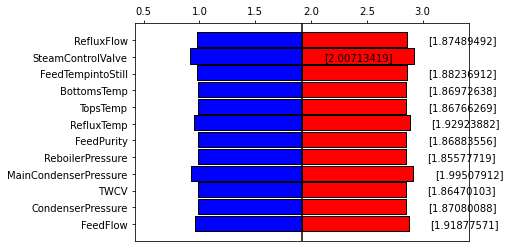

In [34]:
efficiency_sensitivity(X_test, 100, 20)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,RefluxFlow,SteamControlValve,FeedTempintoStill,BottomsTemp,TopsTemp,RefluxTemp,FeedPurity,ReboilerPressure,MainCondenserPressure,TWCV,CondenserPressure,FeedFlow
0,[83.2913808797882],[82.73951875963529],[82.19546738110517],[82.08984869319019],[83.28330017578084],[82.60586379905054],[82.52953610647342],[82.52047463757002],[83.00806191537502],[82.42757082601308],[82.41398862767457],[82.47875378695339]
1,[83.13218827245682],[82.66198902306917],[82.23901353220234],[82.10356653760974],[83.05743959940851],[82.55477068499586],[82.51961273188876],[82.50850792535049],[82.8911462041198],[82.42457720241126],[82.47005698097206],[82.37135833174618]
2,[82.9709451538167],[82.59397669282386],[82.28168325085596],[82.17567542689244],[82.85533701741593],[82.52038581161766],[82.50990337822562],[82.4960680321868],[82.75444469061067],[82.42158357880943],[82.45810935261999],[82.38933881611155]
3,[82.77677527993886],[82.52311767054134],[82.32393904991352],[82.26347325179111],[82.68452776043404],[82.47305815228943],[82.50711559672465],[82.48203730058296],[82.66412735284995],[82.41858995520762],[82.42607930049127],[82.35383766638853]
4,[82.5671398616601],[82.47246473451156],[82.35234985108424],[82.33030868403056],[82.57232877542687],[82.43275871074128],[82.48239597167057],[82.46796578340312],[82.55049845617768],[82.4155963316058],[82.39673830813706],[82.30103811225912]
5,[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659],[82.41676143089659]
6,[82.2668033710191],[82.38038610700744],[82.47728703040144],[82.51378754288092],[82.22713818802809],[82.413799838243],[82.35820683712396],[82.36883714102235],[82.41574982644526],[82.41994553047779],[82.45263911263447],[82.55888321703131]
7,[82.13605159754042],[82.36443105366375],[82.45753979844561],[82.63862527198071],[81.99995533001074],[82.38248290081337],[82.30033138317404],[82.3257620310177],[82.49676934001346],[82.42323979627801],[82.51989453225721],[82.6954525824705]
8,[82.01290378576361],[82.36122124828393],[82.46122180523105],[82.84849163747158],[81.74436219998704],[82.33681426226472],[82.30299710223201],[82.28574244787625],[82.6471633179381],[82.42767056241745],[82.555248296547],[82.79402246536014]
9,[81.88056662710952],[82.3739134198934],[82.4690935192505],[83.0524557055391],[81.43878565092601],[82.29601671885155],[82.31139558471432],[82.27209186240181],[82.86266351322419],[82.43376668483481],[82.63007444622885],[82.88950750833342]


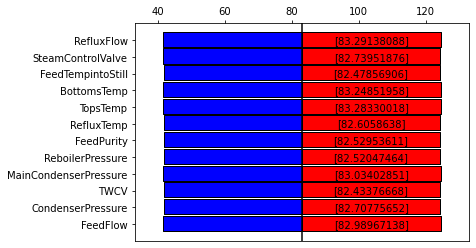

In [35]:
purity_sensitivity(X_test, 100, 20)

In [36]:
import copy
td = copy.deepcopy(test_data)
td = np.array(td)
RefluxFlow_quan = []
SteamControlValve_quan = []
FeedTempintoStill_quan = []
BottomsTemp_quan = []
TopsTemp_quan = []
RefluxTemp_quan = []
FeedPurity_quan = []
ReboilerPressure_quan = []
MainCondenserPressure_quan = []
TWCV_quan = []
CondenserPressure_quan = []
Feedflow_quan = []


for time in range(len(td)):
    RefluxFlow_quan.append(td[time][0]) 
    SteamControlValve_quan.append(td[time][1]) 
    FeedTempintoStill_quan.append(td[time][2]) 
    BottomsTemp_quan.append(td[time][3]) 
    TopsTemp_quan.append(td[time][4]) 
    RefluxTemp_quan.append(td[time][5]) 
    FeedPurity_quan.append(td[time][6])
    ReboilerPressure_quan.append(td[time][7])
    MainCondenserPressure_quan.append(td[time][8]) 
    TWCV_quan.append(td[time][9]) 
    CondenserPressure_quan.append(td[time][10]) 
    Feedflow_quan.append(td[time][11]) 

reflux = []
scv = []
for time in range(len(td)):
    td[time][0] += np.std(RefluxFlow_quan)*0.7
    td[time][1] -= np.std(SteamControlValve_quan)*0.7
    #td[time][2] -= np.std(FeedTempintoStill_quan)*0.7
    #td[time][3] += np.std(BottomsTemp_quan)*0.7
    #td[time][4] -= np.std(TopsTemp_quan)*0.7
    td[time][5] -= np.std(RefluxTemp_quan)*0.7
    #td[time][6] += np.std(FeedPurity_quan)*0.7
    #td[time][7] -= np.std(ReboilerPressure_quan)*0.7
    td[time][8] += np.std(MainCondenserPressure_quan)*0.7
    #td[time][9] += np.std(TWCV_quan)*0.7
    #td[time][10] -= np.std(CondenserPressure_quan)*0.7
    td[time][11] += np.std(Feedflow_quan)*0.7
    reflux.append(td[time][0])
    scv.append(td[time][11])
print(np.mean(reflux))
print(np.mean(scv))
test_inputs = scaler.transform(td)

139.17925755820877
568.1157744601117


C:\Users\Patrice\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
eff_increased_inputs = ANNoutput(test_inputs, w1, b1)
new_avg_eff = np.mean(eff_increased_inputs)
pur_increased_inputs = ANNoutput(test_inputs, w2, b2)
new_avg_pur = np.mean(pur_increased_inputs)

In [38]:
eff_diff = new_avg_eff-np.mean(effOutput(X_test, w1,b1))
pur_diff = new_avg_pur-np.mean(purOutput(X_test,w2,b2))
changes = {'Change in Efficiency': eff_diff,'Change in Purity': pur_diff}
changes

{'Change in Efficiency': 0.04061478958926146,
 'Change in Purity': 1.1120950871171544}

In [39]:
new_avg_eff

1.815470956547741

In [40]:
np.mean(effOutput(X_test, w1,b1))

1.7748561669584795

In [41]:
new_steam_flow = (413.94/new_avg_eff)*6.65*60
avg_flow = 95311
avg_purity = 83.45

{'Average Steam Flow(LB/HR)':avg_flow,
 'Average Purity(%)': avg_purity,
 'New Steam Flow(LB/HR)': new_steam_flow,
 'New Purity(%)': new_avg_pur,
 'Steam Flow Difference(LB/HR)':new_steam_flow - avg_flow,
 'Purity Difference(%)': new_avg_pur - avg_purity}

{'Average Steam Flow(LB/HR)': 95311,
 'Average Purity(%)': 83.45,
 'New Steam Flow(LB/HR)': 90974.77401349813,
 'New Purity(%)': 84.54005195607593,
 'Steam Flow Difference(LB/HR)': -4336.225986501871,
 'Purity Difference(%)': 1.090051956075925}